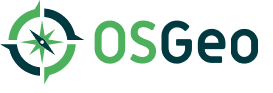

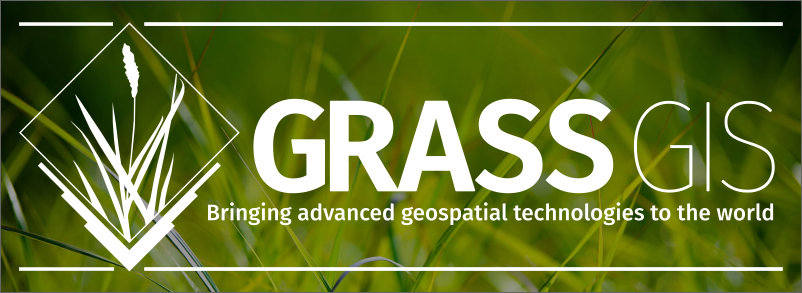


# Start up
### There's a bunch of code we need to run first before diving into analysis.

Take a sip of your coffee/tea & a bite of your muffin or other superior food item

<span style="font-family:Dubai; color:#555555; font-size:17px;">
Important Imports! Python standard library and IPython packages we need.

In [ ]:
import os
import subprocess
import sys
from IPython.display import Image

In [ ]:
# Ask GRASS GIS where its Python packages are.
subprocess.run(["grass", "--config", "python_path"], text=True)

In [ ]:
# Add the answer to a list of useful paths for this project
sys.path.append('/home/jovyan/grass/dist.x86_64-pc-linux-gnu/etc/python')

In [ ]:
sys.path # not necessary to run but helpful in checking that the path was appended

<span style="font-family:Dubai; color:#555555; font-size:17px;">
Special import statements for the two GRASS library modules that are needed!

In [ ]:
import grass.script as gs
import grass.jupyter as gj

<span style="font-family:Dubai; color:#555555; font-size:17px;">
Start/initialize a GRASS GIS session pointing to our test data location

In [ ]:
session = gj.init("/home/jovyan/data/", "testLocation", "PERMANENT")
print(session)

<span style="font-family:Dubai; color:#555555; font-size:17px;">
Set working location of data

In [ ]:
os.chdir('/home/jovyan/data/testLocation')
print(os.getcwd()) # to double-check!

<span style="font-family:Dubai; color:#555555; font-size:17px;">
Create map instance

In [ ]:
smap = gj.Map() #this for displaying it in this here notebook

<span style="font-family:Dubai; color:#555555; font-size:17px;">
Tell OS that we want to use a renderer called cairo

In [ ]:
os.environ['GRASS_RENDER_IMMEDIATE'] = 'cairo'

# 1. IMPORT YIELD DATA

<span style="font-family:Dubai; color:#555555; font-size:17px;">
    
## 1st GRASS SCRIPT!  
<li>import a vector
<li>from a file called "name"
<li>with Coordinate Reference System code ####
<li>call our map "thisname_map"
<li>Override projection check (use current location's projection). Assume that the dataset has the same projection as the current location

# Some pre-processing and setting up

In [ ]:
# 1. Import SHAPEFILE data
gs.run_command("v.import", input="EX1.shp", epsg="4326", output="ex1_map", flags="o")

In [ ]:
# 1. Import TEXTFILE data
gs.run_command("v.import", input="RAW-DATA.csv", epsg="4326", output="sampletable", flags="o")

In [ ]:
# Set computational region to this new dataset
#gs.run_command("g.region", vector="sampletable")

## 2. Take a look at the imported data table to examine column datatypes for useability in mapping
i.e. Longitude & Latitude coordinates need to be of datatype numeric (for obvious reasons), NOT text
<br>But as we see upon examination, every column imported as TEXT datatype

In [ ]:
gs.run_command("db.describe", table="sampletable")

## 3. Add three new columns of a numeric datatype "double (precision)" so that we can copy/cast into them the values 
#### from their text datatype columns (the original ones from the csv that all get imported as datatype text)

In [ ]:
gs.run_command("v.db.addcolumn", map="sampletable", columns="YieldMassDry_lb_ac double, Longitux double, Latitudey double")

## 4. Check that new columns were added and with correct data type

In [ ]:
gs.run_command("v.info", map="sampletable", flags="c")

## 5. Cast the original columns into new ones so that it all becomes numeric and useable!

In [ ]:
gs.run_command("v.db.update", map="sampletable", column="YieldMassDry_lb_ac", query_column="CAST(Yld_Mass_Dry__lb_ac_ AS numeric)")
gs.run_command("v.db.update", map="sampletable", column="Longitux", query_column="CAST(Longitude AS numeric)")
gs.run_command("v.db.update", map="sampletable", column="Latitudey", query_column="CAST(Latitude AS numeric)")

## 6. Check that the new column received the values (NOTE: there's 16,000+ records that will get printed!!)

In [ ]:
gs.run_command("v.db.select", map="sampletable", column="YieldMassDry_lb_ac")

In [ ]:
#gs.run_command("v.db.select", map="sampletable", column="Longitux")

<span style="font-family:Dubai; color:#555555; font-size:17px;">

# "Light it up!" :)
    * vector colors module
    * for our map we're making
    * using an attribute in the data file
    * from the column we wont 
    * use red-yellow-green (ryg) colors ramp!

## 7. Use ("database"/db) table and our freshly created numeric columns in it to bring into being a vector layer...

In [ ]:
gs.run_command("v.in.db", table="sampletable", x="Longitux", y="Latitudey", key="cat", output="sampmap", overwrite="overwrite", flags="t")

## 8. Set the db table as the attribute table for the freshly created vector layer

In [ ]:
gs.run_command("v.db.connect", map="sampmap", table="sampletable", flags="o")

## 9. Coloring time! Let's assign our new vector map layer a color ramp of "ryg" - red, yellow, green.
 And obviously we want to see our important Yield Mass (Dry) values using this color ramp.<br>
 So it will display the highest yield values as green, and the lowest (possibly zeros, or errors) as red.<br>
 Makes sense, right?!

In [ ]:
gs.run_command("v.colors", map="sampmap", use="attr", column="YieldMassDry_lb_ac", color="ryg")

<span style="font-family:Dubai; color:#555555; font-size:17px;">
    
## 10. "Show. Me. The Mappy!" <br> 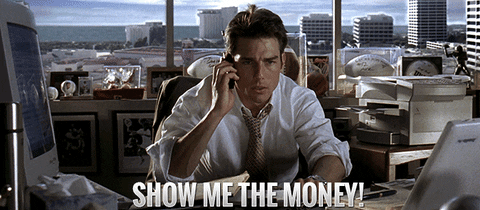
### (And hopefully it's all green like MONEY!)

In [ ]:
smap = gj.Map()
smap.run("d.vect", map="sampmap", display="shape", type="point", color="none", fill_color="none", width="1", icon="basic/circle", size="4")
smap.save(filename="sampmap.png")
smap.save(filename="sampmap.shp")
smap.show()

# Create detail/zoomed in map view

In [ ]:
detail_smap = gj.Map(height=1000, width=1000)
detail_smap.run("d.vect", map="sampmap", type="point", color="none", fill_color="none", width="1", icon="basic/circle", size="5")
detail_smap.show()

In [ ]:
detail_smap.save(filename="detailmap.png")
detail_smap.save(filename="detailmap.shp")

------------------

# View attribute table to scrutinize data quality

<span style="font-family:Dubai; color:#555555; font-size:17px;">

Words go here that explain the code below.
WORDS GO HERE THAT EXPLAIN THE CODE BELOW

In [ ]:
from grass.script import vector
vector.vector_db(map="sampmap")


# from grass.pygrass.vector import VectorTopo
# somename = VectorTopo('ex1_map')
# somename.open(mode-'r')
# dblinks = DBlinks(somename.c_mapinfo)
# dblinks
# DBlinks([Link(1, mapname, sqlite)])
# link = DBlinks[0]
# Link(1, mapname, sqliteabs)
# table = link.table()

##Here, DBlinks is a class that contains all the links of a vector map. 
##Each link is also a class (Link) that contains a specific link’s parameters. 
##The table() method of the link class return the linked table as a table object (Table).

In [ ]:
# Alternative way to view attribute data table is to import a nifty Python package called pandas.
import pandas

In [ ]:
mapdata = pandas.read_csv("RAW-DATA.csv")
mapdata

In [ ]:
%%bash
%preview -n RAW-DATA.csv

# Clean up table

<span style="font-family:Dubai; color:#555555; font-size:17px;">
If needed, we can edit attributes to remove errors, null values, zeros, etc.

In [ ]:
gs.run_command("v.db.droprow", input="sampmap", where="Speed_mph_ = 0 OR YieldMassDry_lb_ac = 0", output="NoZerosAllHeros")

In [ ]:
# Check that it happened
gs.run_command("v.db.select", map="NoZerosAllHeros", column="YieldMassDry_lb_ac")

# Reload color for clean map

In [ ]:
# 10. "Show. me. the mappy"!
smap = gj.Map()
smap.run("d.vect", map="NoZerosAllHeros", display="shape", type="point", color="none", fill_color="none", width="1", icon="basic/circle", size="4")
smap.save(filename="NoZerosAllHeros.png")
smap.save(filename="NoZerosAllHeros.shp")
smap.show()

<span style="font-family:Dubai; color:#555555; font-size:17px;">
Words go here that explain the code below.
WORDS GO HERE THAT EXPLAIN THE CODE BELOW

In [ ]:
gs.run_command("d.vect", map="NoZerosAllHeros", type="point", color="none", fill_color="none", icon="basic/circle", size="5")

In [ ]:
detail_map = gj.Map(height=700, width=700)
detail_map.run("d.vect", map="NoZerosAllHeros", type="point", color="none", fill_color="none", width="1", icon="basic/circle", size="5")
detail_map.show()